In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

## Importing Data and Preprocessing EDA

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Clustering\EastWestAirlines.csv")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
data = df.drop(['ID#','Balance'], axis = 1)
data.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,1,1,174,1,0,0,7000,0
1,0,1,1,1,215,2,0,0,6968,0
2,0,1,1,1,4123,4,0,0,7034,0
3,0,1,1,1,500,1,0,0,6952,0
4,0,4,1,1,43300,26,2077,4,6935,1


## Standerizing the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

In [10]:
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_df

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


## Using Knee Plot

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

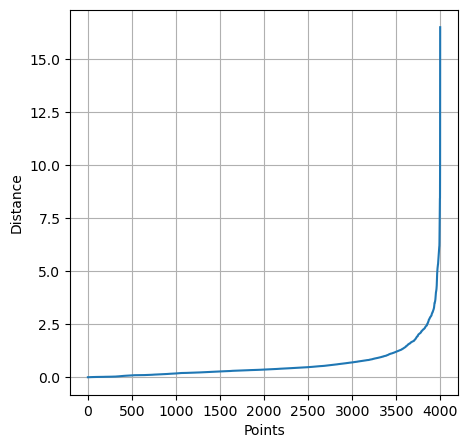

In [12]:
n_neighbor = NearestNeighbors(n_neighbors=9)
neighbor = n_neighbor.fit(scaled_df)
distances,indices = neighbor.kneighbors(scaled_df)
max_distances = np.sort(distances[:,8] , axis = 0)
fig = plt.figure(figsize=(5, 5))
plt.plot(max_distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()
plt.show()

## DBSCAN

In [13]:
dbscan = DBSCAN(eps = 2 , min_samples= 5)
cluster = dbscan.fit_predict(scaled_df)

In [14]:
cluster

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
set(cluster)

{-1, 0, 1, 2, 3, 4}

In [17]:
data['Cluster'] = cluster
data

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,0,1,1,1,174,1,0,0,7000,0,0
1,0,1,1,1,215,2,0,0,6968,0,0
2,0,1,1,1,4123,4,0,0,7034,0,0
3,0,1,1,1,500,1,0,0,6952,0,0
4,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,0,1,1,1,8525,4,200,1,1403,1,1
3995,0,1,1,1,981,5,0,0,1395,1,1
3996,0,3,1,1,25447,8,0,0,1402,1,1
3997,0,1,1,1,500,1,500,1,1401,0,0


In [18]:
data.groupby('Cluster').mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,
-1,1920.458647,2.796992,1.120301,1.368421,54021.639098,27.962406,4401.706767,11.676692,4632.360902,0.736842
0,61.515460,1.698942,1.000000,1.000000,9830.789666,8.929211,193.664361,0.572823,3820.368186,0.000000
1,123.409455,2.657455,1.000000,1.000000,26796.075636,14.733818,561.888000,1.826182,4608.083636,1.000000
2,0.000000,1.000000,3.000000,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.000000
3,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000
4,0.000000,1.125000,2.000000,1.000000,10199.250000,15.625000,245.375000,0.750000,4853.125000,1.000000
